In [30]:
from helper import *

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
def cleaning(str):
    str = str
    return str

In [33]:
import pandas as pd
from numpy import array

fo = pd.ExcelFile('news.xlsx')
df = pd.read_excel(fo, 'Sheet1')

data = df.head(5)

text = df['text']
text_list =  [i.split() for i in text]
print(len(text_list))
#print(text_list)

4914


In [34]:
#Create Biagram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])

for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)


In [35]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2)
print(dictionary)

Dictionary(3517 unique tokens: ['air', 'axiata', 'baik', 'berbagai', 'berkualitas']...)


In [36]:
#build corpus
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]

print(len(doc_term_matrix))
print(doc_term_matrix[100])

tfidf = models.TfidfModel(doc_term_matrix)
corpus_tfidf = tfidf[doc_term_matrix]

4914
[(55, 1), (101, 1), (105, 1), (154, 1), (533, 1), (741, 1), (742, 1), (743, 1), (744, 1), (745, 1)]


In [37]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

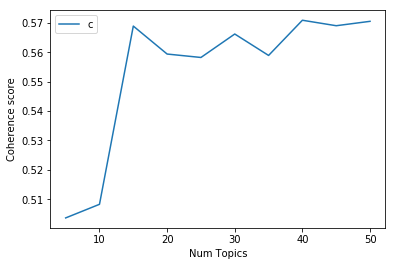

In [38]:
start=5
limit=51
step=5
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [39]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 5  has Coherence Value of 0.5036
Num Topics = 10  has Coherence Value of 0.5083
Num Topics = 15  has Coherence Value of 0.5689
Num Topics = 20  has Coherence Value of 0.5594
Num Topics = 25  has Coherence Value of 0.5582
Num Topics = 30  has Coherence Value of 0.5662
Num Topics = 35  has Coherence Value of 0.5589
Num Topics = 40  has Coherence Value of 0.5709
Num Topics = 45  has Coherence Value of 0.569
Num Topics = 50  has Coherence Value of 0.5705


In [48]:
from pprint import pprint

model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=40)
pprint(model.print_topics())

[(7,
  '0.061*"pertamina" + 0.028*"mrt" + 0.021*"perseroan" + 0.016*"november" + '
  '0.015*"struktur" + 0.011*"kementerian_keuangan" + 0.011*"jalan_tol" + '
  '0.010*"bahan_bakar" + 0.009*"dana" + 0.009*"koordinasi"'),
 (19,
  '0.031*"sepanjang_kilometer" + 0.026*"jalan_tol" + 0.017*"manufaktur" + '
  '0.015*"bengkulu" + 0.014*"tol" + 0.014*"sepanjang" + 0.013*"badan_pengatur" '
  '+ 0.012*"kilometer" + 0.011*"kuala_tanjung" + 0.009*"rekomendasi"'),
 (11,
  '0.029*"investasi_sektor" + 0.023*"kementerian_bumn" + 0.015*"bali_utara" + '
  '0.014*"pita_lebar" + 0.013*"pembangunan_infrastruktur" + 0.012*"bali" + '
  '0.011*"investasi" + 0.011*"serat_optik" + 0.010*"pesawat" + '
  '0.009*"program_pita"'),
 (4,
  '0.053*"holding" + 0.034*"holding_bumn" + 0.023*"lrt_palembang" + '
  '0.015*"bumn" + 0.012*"mnc_play" + 0.012*"pgn" + 0.011*"pembentukan_holding" '
  '+ 0.010*"direktur_utama" + 0.009*"mnc" + 0.009*"direktur"'),
 (6,
  '0.028*"harga_gas" + 0.024*"nilai_investasi" + 0.021*"harga" + 

In [62]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=40)

for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.084*"holding" + 0.017*"holding_migas" + 0.016*"train" + 0.016*"optimal" + 0.015*"lrt_jakarta" + 0.015*"service" + 0.014*"service_obligation" + 0.012*"asian_games" + 0.012*"mandeh" + 0.010*"presiden_jokowi"
Topic: 1 Word: 0.031*"total_kapasitas" + 0.022*"hilir" + 0.020*"bahan_bakar" + 0.020*"pendanaan" + 0.019*"rapat_koordinasi" + 0.017*"cakung" + 0.017*"alternatif" + 0.016*"lahan_seluas" + 0.013*"menteri_koordinator" + 0.012*"total"
Topic: 2 Word: 0.068*"palapa_ring" + 0.024*"bendungan" + 0.024*"palapa" + 0.023*"ring" + 0.022*"jepara" + 0.017*"pelanggan" + 0.017*"penyelesaian" + 0.011*"rudiantara" + 0.010*"efisien" + 0.010*"kartini"
Topic: 3 Word: 0.030*"perseroan" + 0.016*"mulai" + 0.013*"sepanjang_kilometer" + 0.013*"jaringan" + 0.012*"jalan_tol" + 0.011*"mulai_dioperasikan" + 0.009*"lakukan" + 0.009*"dioperasikan" + 0.008*"rumah" + 0.008*"cabang"
Topic: 4 Word: 0.025*"pesawat" + 0.022*"pita_lebar" + 0.019*"program_pita" + 0.018*"dpr_ri" + 0.017*"serat_optik" + 0.015

In [64]:
import pandas as pd
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])

#pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_csv("top_words2.csv")
print(df)

None


In [63]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()

data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'lda-gensim-40.html')

PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
20     5.406000        1       1 -0.288658  0.003357
27     3.664363        1       2 -0.046676 -0.060660
13     3.530381        1       3 -0.050486 -0.025849
15     3.182938        1       4  0.074324  0.027326
22     3.076121        1       5 -0.007235 -0.094345
2      3.056363        1       6  0.008446 -0.188181
21     3.054903        1       7  0.075298 -0.126157
18     3.013633        1       8  0.000648  0.028512
10     2.879955        1       9 -0.137267  0.062862
32     2.776192        1      10  0.010287  0.009027
4      2.711467        1      11  0.050095 -0.164229
17     2.683459        1      12 -0.009353 -0.065617
34     2.658079        1      13  0.080249  0.012812
24     2.561052        1      14  0.002217 -0.057633
39     2.548123        1      15  0.038564  0.023706
33     2.515942        1      16  0.046242  0.022852
31     2.502594

In [43]:
import numpy as np
# Show top n keywords for each topic
def show_topics(vectorizer, lda_model, n_words=10):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=doc_term_matrix, lda_model=model, n_words=10)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

AttributeError: 'list' object has no attribute 'get_feature_names'